# 워드클라우드 만들어보기

크롤링 결과 중 해시태그 데이터 불러오기

In [5]:
import pandas as pd
raw_total = pd.read_excel("C:\\Users\\KIM EUNKI\\Google 드라이브\\GitHub\\Practice\\Instagram_Crawling\\Insta_Sadang.xlsx")

raw_total.head()

,Unnamed: 0,content,data,like,place,tags
0,0,#당산오돌한번 꽂힌 이후로 주기적으로 ᄀ...,2020-05-26,"1,162",사당역,"['#당산오돌한번', '#사당맛집', '#사당..."
1,1,"#얼쑤 #신토불이 족발에 막걸리 한잔!맛, 서비스, 위생, 청결, 규모 그 어디도 ...",2020-06-16,"1,311",수향가 사당점,"['#얼쑤', '#신토불이', '#사당맛집', '#사당역맛집', '#사당역모임장소'..."
2,2,"불족에 막걸리 꿀맛 ,,기본찬으로 나오느...",2020-06-12,"11,142",사당역,"['#사당맛집', '#사당역맛집', '#사당역..."
3,3,..취향저격 맛집 👊이수에서~ 사당까지!내 이...,2020-06-04,"1,062",NaN,"['#사당맛집', '#사당족발', '#사당역맛..."
4,4,-일하다먹는 앙버떡 꿀맛❤️매장에 여유이...,2020-06-06,309,남성사계시장,"['#떡', '#이수떡집', '#정애맛담', '#민ᄉ..."


In [16]:
raw_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1000 non-null   int64 
 1   content     1000 non-null   object
 2   data        999 non-null    object
 3   like        1000 non-null   int64 
 4   place       341 non-null    object
 5   tags        1000 non-null   object
dtypes: int64(2), object(4)
memory usage: 47.0+ KB


In [6]:
#해시태그 통합저장
tags_total = []

for tags in raw_total['tags']:
    tags_list = tags[2:-2].split("', '")
    for tag in tags_list:
        tags_total.append(tag)

In [7]:
tags_total[:10]

['#당산오돌한번',
 '#사당맛집',
 '#사당역맛집',
 '#사당고기집',
 '#사당맛집추천',
 '#얼쑤',
 '#신토불이',
 '#사당맛집',
 '#사당역맛집',
 '#사당역모임장소']

In [8]:
#빈도수 집계
from collections import Counter
tags_counts = Counter(tags_total)

In [9]:
tags_counts.most_common(30) #가장 많이 사용된 상위 10개의 해시태그
#사당맛집이라는 해시태그가 가장 많이 사용됨을 알 수 있다.

[('#사당맛집', 608),
 ('#사당역맛집', 385),
 ('#이수맛집', 356),
 ('#이수역맛집', 351),
 ('#사당술집', 324),
 ('#방배동맛집', 312),
 ('#사당회식장소', 304),
 ('#서초구맛집', 304),
 ('#맛집스타그램', 304),
 ('#서초맛집', 302),
 ('#동작구맛집', 302),
 ('#사당역술집', 300),
 ('#족발맛집', 298),
 ('#사당족발', 293),
 ('#사당역족발', 290),
 ('#사당맛집100족발', 288),
 ('#100족발..', 177),
 ('', 144),
 ('#사당맛집', 137),
 ('#사당', 88),
 ('#맛스타그램', 79),
 ('#100족발', 76),
 ('#먹스타그램', 73),
 ('#먹스타그램', 50),
 ('#맛스타그램', 49),
 ('#방배맛집', 45),
 ('#사당역', 43),
 ('#이수맛집', 40),
 ('#사당', 36),
 ('#사당역맛집', 33)]

In [11]:
#위치정보가 저장되어 있는 데이터 빈도수 집계
#위치정보 기입은 선택사항이기 때문에 데이터가 많지 않음. (1,000개 게시물 중 135개 뿐..)
raw_total['place'].value_counts()

사당역                    43
사당 어딘가                 27
이수역                    10
서초구방배동                  8
파니모들                    7
                       ..
카페,진리                   1
조가네갑오징어 사당역방배점          1
여름아안녕                   1
커피버넷 coffee burnett     1
크리스피크림도넛 사당점            1
Name: place, Length: 147, dtype: int64

In [12]:
pd.DataFrame(raw_total['place'].value_counts())

,place
사당역,43
사당 어딘가,27
이수역,10
서초구방배동,8
파니모들,7
...,...
"카페,진리",1
조가네갑오징어 사당역방배점,1
여름아안녕,1
커피버넷 coffee burnett,1


In [13]:
#막대차트 그려보기
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
import sys

if sys.platform in ['win32', 'win64']:
    font_name = 'malgun gothic'
elif sys.platform in ['darwin']:
    font_name = 'AppleGothic'
    
rc('font', family = font_name)

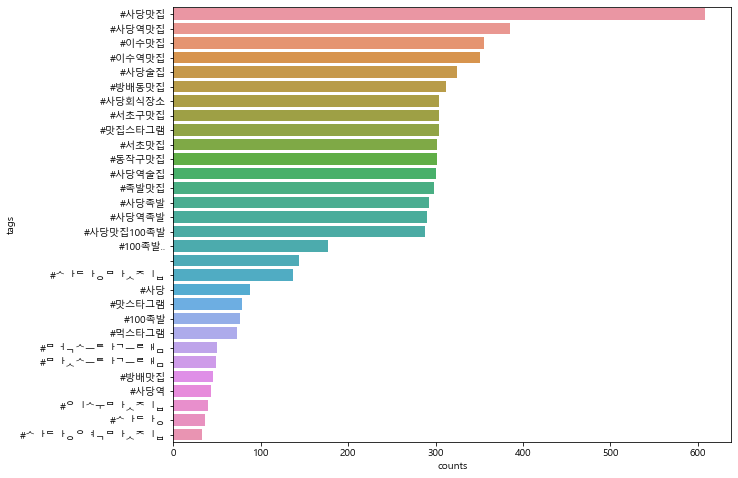

In [21]:
tag_counts_df = pd.DataFrame(tags_counts.most_common(30))
tag_counts_df.columns = ['tags', 'counts']

plt.figure(figsize = (10, 8))
sns.barplot(x='counts', y='tags', data=tag_counts_df)
plt.savefig("C:\\Users\\KIM EUNKI\\Google 드라이브\\GitHub\\Practice\\Instagram_Crawling\\Insta_Sadang_barplot.png")

In [16]:
#워드클라우드 라이브러리 불러오기
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import platform

if platform.system() == 'Windows':
    font_path = 'c:\\windows\\Fonts\\malgun.ttf'

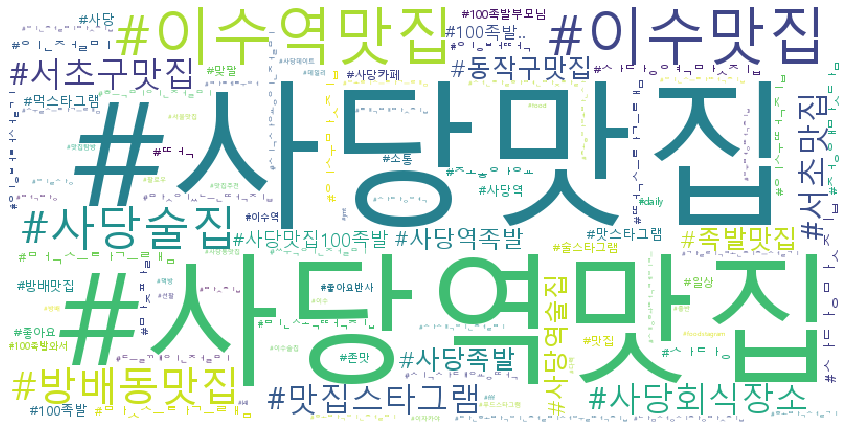

In [20]:
wordcloud = WordCloud(font_path = font_path,
                     background_color = 'white',
                     max_words = 100,
                     relative_scaling = 0.3,
                     width = 800,
                     height = 400,).generate_from_frequencies(tags_counts)

plt.figure(figsize = (15, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig("C:\\Users\\KIM EUNKI\\Google 드라이브\\GitHub\\Practice\\Instagram_Crawling\\Insta_Sadang_WordCloud.png")